In [515]:
import pandas as pd#importing necessary library
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [516]:
air=pd.read_csv("Airbnb Dataset 19.csv")# loading Airbnb dataset using pandas

In [517]:
air.head()#displaying the top five records of the  airbnb dataframe

,Name,Host_Id,Host_name,Neighbourhood_group,Neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Skylit Midtown Castle,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,The Village Of Harlem....New York,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home,225,1,45,21-05-2019,0.38,2,355
2,Cozy Entire Floor Of Brownstone,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,21-05-2019,0.00,1,365
3,Entire Apt: Spacious Studio/Loft By Central Park,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home,89,1,270,05-07-2019,4.64,1,194
4,Large Cozy 1 Br Apartment In Midtown East,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home,80,10,9,19-11-2018,0.10,1,0


In [518]:
air.shape#finding out the number of rows and columns in our dataframe

(218, 15)

In [519]:
air.describe()#descriptive analysis of features of dataframe

,Host_Id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.180000e+02,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,1.567474e+05,40.730795,-73.287220,149.399083,8.990826,99.706422,1.031376,1.467890,189.444954
std,4.272502e+05,0.049176,10.019379,94.634204,20.925805,101.815348,1.024562,0.960691,128.027428
min,2.787000e+03,40.631880,-74.080880,35.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.282000e+04,40.689445,-73.985315,86.000000,2.000000,21.000000,0.240000,1.000000,53.750000
50%,1.065830e+05,40.722940,-73.965975,130.000000,3.000000,63.500000,0.665000,1.000000,214.500000
75%,1.937008e+05,40.762313,-73.948972,190.000000,6.000000,158.750000,1.632500,2.000000,303.500000
max,6.197784e+06,40.867540,73.967920,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


In [520]:
air.dtypes# checking the type of data type available in the dataframe

Name                               object
Host_Id                             int64
Host_name                          object
Neighbourhood_group                object
Neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [521]:
category=air.dtypes[air.dtypes=="object"].index#finding out the categorical columns in dataframe

In [522]:
print(category)#printting the categorical columns

Index(['Name', 'Host_name', 'Neighbourhood_group', 'Neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


In [523]:
air[category]# checking what data is present in categorical columns

,Name,Host_name,Neighbourhood_group,Neighbourhood,room_type,last_review
0,Skylit Midtown Castle,John,Brooklyn,Kensington,Private room,19-10-2018
1,The Village Of Harlem....New York,Jennifer,Manhattan,Midtown,Entire home,21-05-2019
2,Cozy Entire Floor Of Brownstone,Elisabeth,Manhattan,Harlem,Private room,21-05-2019
3,Entire Apt: Spacious Studio/Loft By Central Park,LisaRoxanne,Brooklyn,Clinton Hill,Entire home,05-07-2019
4,Large Cozy 1 Br Apartment In Midtown East,Laura,Manhattan,East Harlem,Entire home,19-11-2018
...,...,...,...,...,...,...
213,"Quiet, Clean Midtown Apt W. Elevato",Tunji,Manhattan,Chinatown,Private room,23-06-2019
214,Bk Sweet Suite W/Kitchen&Fullbath,Anna/Fonzy,Manhattan,Midtown,Entire home,30-04-2019
215,Great East Village Apartment Rental,Colette&Sean,Brooklyn,East Flatbush,Entire home,14-06-2019
216,Brownstone Sundrenched Beauty,Brie,Manhattan,East Village,Entire home,26-05-2019


In [524]:
air.isnull().sum()# checking whether our data has any null values in it or not

Name                              1
Host_Id                           0
Host_name                         0
Neighbourhood_group               0
Neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [531]:
air.dropna(inplace=True)#since we have only one null value so we can drop it

# Analysis of data by type of rooms available in newyork

In [549]:
grouped=pd.DataFrame(air.groupby("room_type")["Host_Id"].count())#creating a data frame by grouping the room type with the count of rooms using host id

In [550]:
grouped["Average_price"]=air.groupby("room_type")["price"].mean().round(0)#addind a column to the dataframe

In [551]:
grouped.head()#printing the dataframe and analysing it with type of room versus average price

,Host_Id,Average_price
room_type,,
Entire home,122,193.0
Private room,94,94.0
Shared room,1,105.0


### from the above analysis we came to the conclusion that the staying in entire room in newyork is the most expensive

In [552]:
x=grouped.index
y=grouped["Average_price"]

### now analysing the same data by visualization

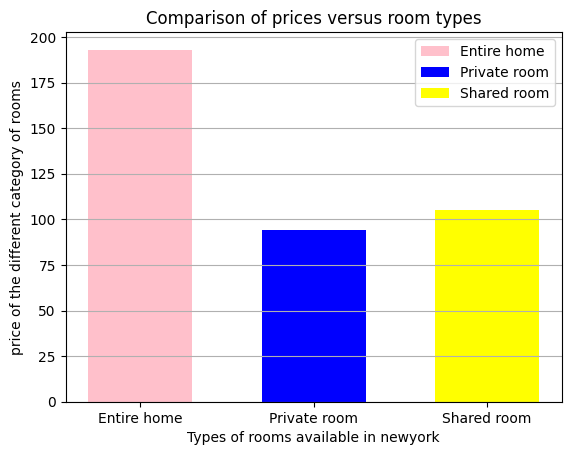

In [553]:
x=grouped.index
y=grouped["Average_price"]
c=["pink","blue","yellow"]
plt.bar(x,y,color=c,width=0.6,label=grouped.index)
plt.grid(axis="y")
plt.xlabel("Types of rooms available in newyork")
plt.ylabel("price of the different category of rooms")
plt.legend()
plt.title("Comparison of prices versus room types")
plt.show()

In [556]:
#creating a dataframe by grouping neighbourhood group with the count of host id

Neighbour_hood=pd.DataFrame(air.groupby("Neighbourhood_group")["Host_Id"].count())
Neighbour_hood


,Host_Id
Neighbourhood_group,
Bronx,1
Brooklyn,94
Manhattan,114
Queens,7
Staten Island,1


### from the above data we can analyse that the manhattan has the maximum number of rooms among all neighbourhood groups in newyork 

In [239]:
fig=px.bar(Neighbour_hood,x=Neighbour_hood.index,y=Neighbour_hood["Host_Id"],color=Neighbour_hood.index,
           title="Rooms available in neighbourhood groups",
          labels={"Neighbour_hood":"Neighbourhood groups","Host_Id":"Number of rooms in neighbourhood groups"})
fig.show()

### we analyse the above data with the help of visualization also using plotly express library

In [581]:
manhattan_full=air.loc[air["Neighbourhood_group"]=="Manhattan"]# creating a seperate manhattan data frame for further analysis

In [582]:
manhattan_full.head()# printing the top five records of the manhattan data frame

,Name,Host_Id,Host_name,Neighbourhood_group,Neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,The Village Of Harlem....New York,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home,225,1,45,21-05-2019,0.38,2,355
2,Cozy Entire Floor Of Brownstone,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,21-05-2019,0.00,1,365
4,Large Cozy 1 Br Apartment In Midtown East,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home,80,10,9,19-11-2018,0.10,1,0
5,Blissartsspace!,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home,200,3,74,22-06-2019,0.59,1,129
7,Cozy Clean Guest Room - Family Apt,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220


### analysing the data with respect to manhattan

In [583]:
manhattan=pd.DataFrame(manhattan_full.groupby("room_type")["Host_Id"].count())# creating a data frame 
manhattan

,Host_Id
room_type,
Entire home,68
Private room,45
Shared room,1


### from the the above data frame we can analyse that in manhattan there are mostly entire home are available 

In [584]:
Brooklyn=air.loc[air["Neighbourhood_group"]=="Brooklyn"]# creating a separate data frame of brooklyn

In [585]:
Brooklyn=pd.DataFrame(Brooklyn.groupby("room_type")["Host_Id"].count())
Brooklyn

,Host_Id
room_type,
Entire home,52
Private room,42


### here we can analyse that in brooklyn there are only entire homes and private rooms are available no shared room is there

In [586]:
Queens=air.loc[air["Neighbourhood_group"]=="Queens"]#creating a separate data frame for further analysis
Queens.head()# printing the top five records

,Name,Host_Id,Host_name,Neighbourhood_group,Neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
41,Charming Brownstone 3 - Near Pratt,50124,Orestes,Queens,Long Island City,40.74771,-73.94740,Private room,130,3,248,01-07-2019,2.25,1,215
71,Fort Greene Retreat On The Park,70091,Justin,Queens,Woodside,40.75038,-73.90334,Private room,70,30,25,31-05-2019,0.22,1,324
129,Flat Macdonough Garden,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,19-09-2011,0.01,1,1
145,"Private, Large & Sunny 1Br W/W&D",110506,Myung,Queens,Sunnyside,40.74559,-73.92313,Private room,79,30,28,12-04-2019,0.26,1,126
161,Couldn'T Be Closer To Columbia Uni,204539,Mark,Queens,Ridgewood,40.70382,-73.89797,Entire home,350,8,10,12-05-2019,0.11,5,365


In [587]:
Queens=pd.DataFrame(Queens.groupby("room_type")["Host_Id"].count())
Queens

,Host_Id
room_type,
Entire home,2
Private room,5


### here we can conclude that in queens there is very few entire home and private room both

In [588]:
Staten_Island=air.loc[air["Neighbourhood_group"]=="Staten Island"]# creating a separate data frame for further analysis
Staten_Island.head()# printing the five records of data frame since it has only one record it is showing only one

,Name,Host_Id,Host_name,Neighbourhood_group,Neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
151,House On Henry (2Nd Flr Suite),185978,Newyorkroomwithaview,Staten Island,St. George,40.64524,-74.08088,Private room,70,2,166,13-06-2019,1.66,1,312


In [589]:
Staten_Island=pd.DataFrame(Staten_Island.groupby("room_type")["Host_Id"].count())#creating a separate data frame for further analysis
Staten_Island

,Host_Id
room_type,
Private room,1


### here we can see that in staten island there is only private room and that too only one is available no entire and shared rooms are available

In [590]:
Bronx=air.loc[air["Neighbourhood_group"]=="Bronx"]#creating a separate data frame for further analysis

Bronx.head()# printing the record of the dataframe

,Name,Host_Id,Host_name,Neighbourhood_group,Neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
153,Light+Open+Airy+Rustic+Modern Loft,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,04-07-2019,2.04,3,353


In [591]:
Bronx=pd.DataFrame(Bronx.groupby("room_type")["Host_Id"].count())
Bronx

,Host_Id
room_type,
Private room,1


### here we can conclude that there is no entire apartment and shared apartment available in bronx only one private room is available

In [594]:
frames = [manhattan,Brooklyn,Queens,Staten_Island,Bronx]# saving all the data frames in a list
  
result = pd.concat(frames,axis=1)# merging all the neighbourhood group data frame together
result.columns=["manhattan","Brooklyn","Queens","Staten Island","Bronx"]# renaming the columns of the dataframe

In [596]:
result# printing the merged data frame

,manhattan,Brooklyn,Queens,Staten Island,Bronx
room_type,,,,,
Entire home,68,52.0,2.0,NaN,NaN
Private room,45,42.0,5.0,1.0,1.0
Shared room,1,NaN,NaN,NaN,NaN


### with this merged data we can cleary see that in mahattan there is entire home,private room but only one shared room is available,after that brooklyn and at last queens has the entire home and private rooms are available in staten island and bronx there is only private room and that too only one is available

# the above analysis we can see through visualization

In [280]:
values=result.loc[:,"manhattan"]
fig=px.pie(result,names="manhattan",values=result.loc[:,"manhattan"],hole=0.5,color=result.index)
fig.update_traces(textinfo="percent+value")
fig.update_layout(title_text="types of rooms available in manhattan",title_x=0.5,
                 legend=dict(
                 orientation="h",
                 yanchor="bottom",
                 xanchor="center"),
                 showlegend=True,legend_bgcolor="yellow",
                 legend_font=dict(color="Green",
                 size=18),
                 font=dict(size=18,color="Orangered"))
fig.show()

# using pie chart we are analysing the data with different neighbourhood groups

In [281]:
values=result.loc[:,"Queens"]
fig=px.pie(result,names="Queens",values=result.loc[:,"Queens"],hole=0.5,color=result.index)
fig.update_traces(textinfo="percent+value")
fig.update_layout(title_text="types of rooms available in Queens",title_x=0.5,
                 legend=dict(
                 orientation="h",
                 yanchor="bottom",
                 xanchor="center"),
                 showlegend=True,legend_bgcolor="yellow",
                 legend_font=dict(color="Green",
                 size=18),
                 font=dict(size=18,color="Orangered"))
fig.show()

In [282]:
values=result.loc[:,"Brooklyn"]
fig=px.pie(result,names="Brooklyn",values=result.loc[:,"Brooklyn"],hole=0.5,color=result.index)
fig.update_traces(textinfo="percent+value")
fig.update_layout(title_text="types of rooms available in Brooklyn",title_x=0.5,
                 legend=dict(
                 orientation="h",
                 yanchor="bottom",
                 xanchor="center"),
                 showlegend=True,legend_bgcolor="yellow",
                 legend_font=dict(color="Green",
                 size=18),
                 font=dict(size=18,color="Orangered"))
fig.show()

In [283]:
values=result.loc[:,"Bronx"]
fig=px.pie(result,names="Bronx",values=result.loc[:,"Bronx"],hole=0.5,color=result.index)
fig.update_traces(textinfo="percent+value")
fig.update_layout(title_text="types of rooms available in Bronx",title_x=0.5,
                 legend=dict(
                 orientation="h",
                 yanchor="bottom",
                 xanchor="center"),
                 showlegend=True,legend_bgcolor="yellow",
                 legend_font=dict(color="Green",
                 size=18),
                 font=dict(size=18,color="Orangered"))
fig.show()

In [284]:
values=result.loc[:,"Staten Island"]
fig=px.pie(result,names="Staten Island",values=result.loc[:,"Staten Island"],hole=0.5,color=result.index)
fig.update_traces(textinfo="percent+value")
fig.update_layout(title_text="types of rooms available in Staten Island",title_x=0.5,
                 legend=dict(
                 orientation="h",
                 yanchor="bottom",
                 xanchor="center"),
                 showlegend=True,legend_bgcolor="yellow",
                 legend_font=dict(color="Green",
                 size=18),
                 font=dict(size=18,color="Orangered"))
fig.show()

# here we are analysing the data with different neigbourhood groups with average cost

In [597]:
manhattan=pd.DataFrame(manhattan_full.groupby("Neighbourhood")["Host_Id"].count())# creating a data frame
manhattan["Average cost"]=manhattan_full.groupby("Neighbourhood")["price"].mean()# adding the column into the above data frame

In [599]:
manhattan.head()#displaying top five records

,Host_Id,Average cost
Neighbourhood,,
Chelsea,7,215.857143
Chinatown,3,173.333333
East Harlem,6,131.500000
East Village,18,150.777778
Financial District,1,196.000000


### here we can see the  different neighbourhood in manhattan with average pricing

In [373]:
fig = px.line(manhattan, x=manhattan.index, y="Average cost", title='ependiture in manhattan with different neighbourhood')
fig.show()

### with the help of line chart also we can see that in manhattan the most expensive neighbourhood is 'Flatiron District' and the cheapest one is the 'Inwood'

In [601]:
x=manhattan.index
y=manhattan["Average cost"]

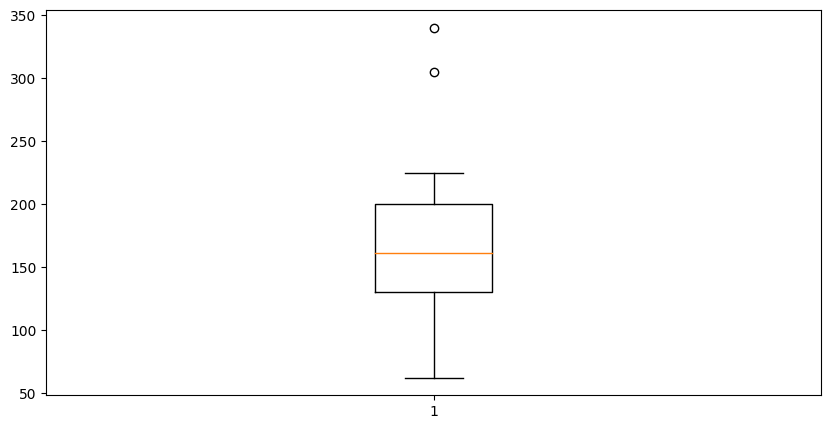

In [602]:
plt.figure(figsize=(10,5))
plt.boxplot(y)
plt.show()# checking for the outliers using simple box plot

### from the above plot it is showing that there are outliers present

In [603]:
manhat_array=np.array(manhattan["Average cost"])#convering the series into array

In [604]:
Q1=np.percentile(manhat_array,25)# with the help of numpy finding out the 25th percentile

In [605]:
Q3=np.percentile(manhat_array,75)# with the help of numpy finding out the 75th percentile

In [606]:
IQR=Q3-Q1#Calculating inter quartile range
print(IQR)

69.25


In [607]:
upper_lim=Q3+1.5*(IQR)# finding out the upper limit 
lower_lim=Q1-1.5*(IQR)# finding out the lower limit

In [608]:
outlier=[]#creating an empty list
for i in manhat_array:
    if i>upper_lim or i<lower_lim:
        outlier.append(i)#with the help of append function and for loop adding the total outliers present in empty outlier list
        

In [609]:
print(outlier)#printing the outlier

[305.0, 340.0]


In [610]:
outlier_index=np.where((outlier))#finding out the index of the outlier in the data frame with the help of numpy library

In [611]:
outlier_index#printing the outlier

(array([0, 1], dtype=int64),)

In [449]:
Queens_full=air.loc[air["Neighbourhood_group"]=="Queens"]#creating a different data frame


In [613]:
Queens_full.groupby("Neighbourhood")["price"].mean()
Queens=pd.DataFrame(Queens_full.groupby("Neighbourhood")["price"].mean())
Queens

,price
Neighbourhood,
Ditmars Steinway,140.0
Flushing,140.0
Jamaica,55.0
Long Island City,130.0
Ridgewood,350.0
Sunnyside,79.0
Woodside,70.0


### from above we can see that the most expensive neighbourhood is "ridgewood" in queens

In [614]:
y=np.array(Queens["price"])
x=Queens.index
fig = px.line(Queens, x=Queens.index, y="price", title='Average expenditure in Queens with different neighbourhood')
fig.show()

### we can see through the visualization which we have concluded above

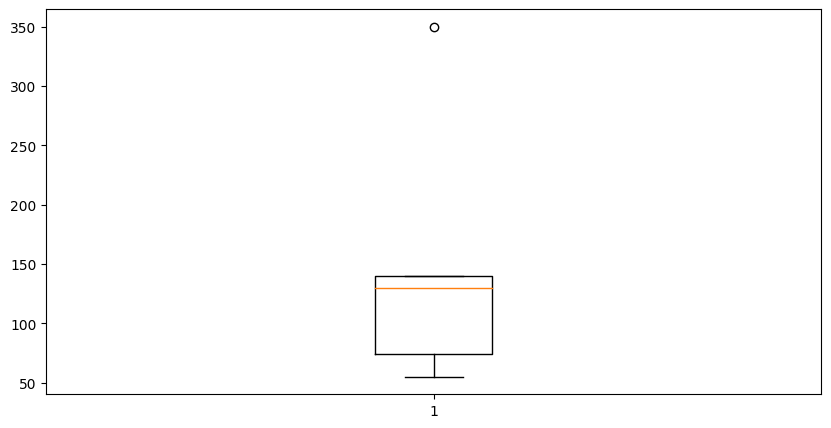

In [615]:
x=Queens["price"]#checking the outlier using simple bar graph
plt.figure(figsize=(10,5))
plt.boxplot(x)
plt.show()

In [453]:
Q1=np.percentile(x,25)#calculating the 25th percentile
Q3=np.percentile(x,75)#calculating the 75th percentile

In [454]:
IQR=Q3-Q1#calculating inter quartile range
print(IQR)

65.5


In [616]:
upper_lim=Q3+1.5*(IQR)#finding out the upper limit
lower_lim=Q1-1.5*(IQR)#finding out the lower limit

In [617]:
outlier=[]#with the help of for loop we are finding out the outliers
for i in x:
    if i>upper_lim or i<lower_lim:
        outlier.append(i)
        

In [618]:
print(outlier)#printing the outlier

[350.0]


In [619]:
outlier_index=np.where((outlier))#finding out the index of the outlier in the data frame
print(outlier_index)

(array([0], dtype=int64),)


In [462]:
Brooklyn_full=air.loc[air["Neighbourhood_group"]=="Brooklyn"]#creating separate data frame


In [621]:
Brooklyn_full.groupby("Neighbourhood")["price"].mean()
Brooklyn=pd.DataFrame(Brooklyn_full.groupby("Neighbourhood")["price"].mean())
Brooklyn

,price
Neighbourhood,
Bedford-Stuyvesant,99.357143
Boerum Hill,475.000000
Brooklyn Heights,800.000000
Bushwick,74.750000
Carroll Gardens,175.000000
Clinton Hill,92.428571
Cobble Hill,149.500000
Crown Heights,99.000000
DUMBO,250.000000


### from above we can conclude that in brooklyn staying in "brooklyn heights"is the most expensive

In [622]:
y=np.array(Brooklyn["price"])
x=Queens.index
fig = px.line(Brooklyn, x=Brooklyn.index, y="price", title='Average expenditure in Brooklyn with different neighbourhood')
fig.show()

### by plotting also we can see that 'brooklyn heights' is the expensive one and the 'East Flatbush' is the cheaper one

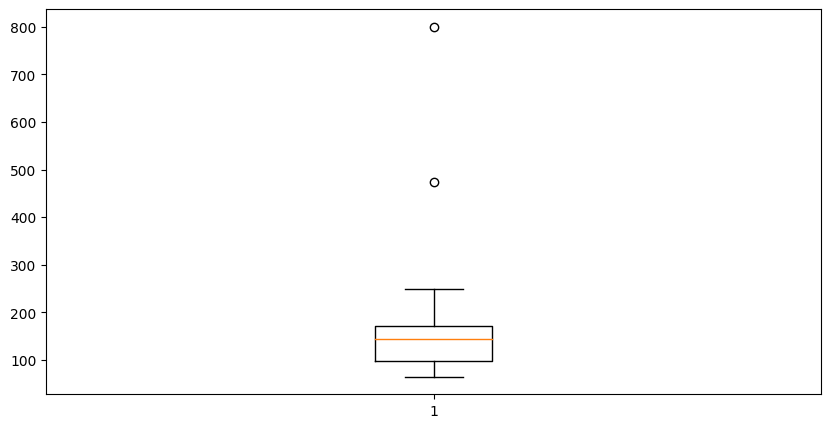

In [623]:
#checking for the outlier present 
x=Brooklyn["price"]
plt.figure(figsize=(10,5))
plt.boxplot(x)
plt.show()

In [466]:
Q1=np.percentile(x,25)#calculating the 25th percentile
Q3=np.percentile(x,75)#calculating the 75th percentile


In [624]:
IQR=Q3-Q1#calculating the inter quartile range
print(IQR)

69.25


In [468]:
upper_lim=Q3+1.5*(IQR)#finding out the upper limit
lower_lim=Q1-1.5*(IQR)#finding out the lower limit

In [625]:
# with the help of for loop finding out the outlier
outlier=[]
for i in x:
    if i>upper_lim or i<lower_lim:
        outlier.append(i)

In [626]:
print(outlier)# printing the outliers

[475.0, 800.0]


In [627]:
outlier_index=np.where((outlier))#finding out the index of the outlier in dataframe
print(outlier_index)

(array([0, 1], dtype=int64),)


In [630]:
#analysing the Bronx neighbourhood group
Bronx_full=air.loc[air["Neighbourhood_group"]=="Bronx"]
Bronx_full.groupby("Neighbourhood")["price"].mean()
Bronx=pd.DataFrame(Bronx_full.groupby("Neighbourhood")["price"].mean())
Bronx

,price
Neighbourhood,
Highbridge,40.0


### we can see here that in Bronx only one neighbourhood is present so there is no need of analysing it with graph

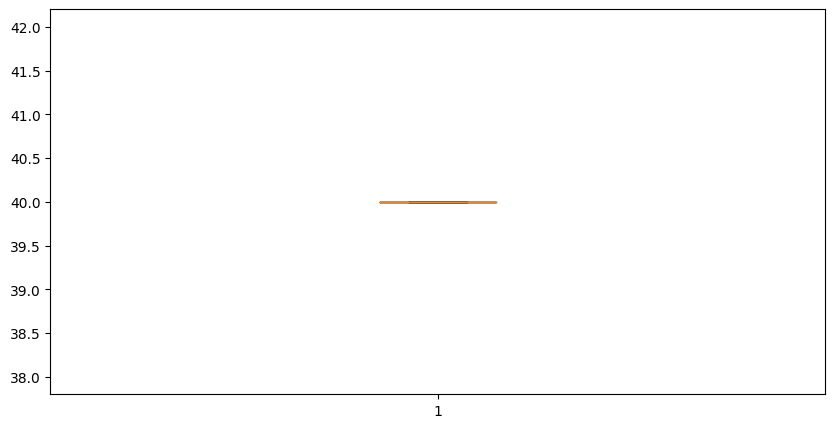

In [632]:
#checking for outlier using box plot of matplotlib
x=Bronx["price"]
plt.figure(figsize=(10,5))
plt.boxplot(x)
plt.show()

### from the above graph we can analyse that there is no outlier present

In [481]:
#analysing the data with staten island 
Staten_full=air.loc[air["Neighbourhood_group"]=="Staten Island"]
Staten_full.groupby("Neighbourhood")["price"].mean()
Staten=pd.DataFrame(Bronx_full.groupby("Neighbourhood")["price"].mean())
Staten

,price
Neighbourhood,
Highbridge,40.0


### from above we can analyse that there is only one neighbourhood present in staten island so we no need to analyse it visually

In [1108]:
#loading the data set in pandas using read_csv
hr=pd.read_csv("HRDataset_v14.csv")

In [1109]:
#displaying the top five records in the data frame
hr.head()

,Employee_Name,EmpID,EmpStatusID,PerfScoreID,FromDiversityJobFairID,Salary,PositionID,Position,State,Zip,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,Adinolfi Wilson K,10026,1,4,0,62506,19,Production Technician I,MA,1960,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,17-01-2019,0,1
1,Ait Sidi Karthikeyan,10084,5,3,0,104437,27,Sr. DBA,MA,2148,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,24-02-2016,0,17
2,Akinkuolie Sarah,10196,5,3,0,64955,20,Production Technician II,MA,1810,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,15-05-2012,0,3
3,AlagbeTrina,10088,1,3,0,64991,19,Production Technician I,MA,1886,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,03-01-2019,0,15
4,Anderson Carol,10069,5,3,0,50825,19,Production Technician I,MA,2169,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,01-02-2016,0,2


In [1110]:
#dropping the unnecessary columns
hr=hr.drop(columns=["Employee_Name","FromDiversityJobFairID","Zip","ManagerName","RecruitmentSource","EngagementSurvey","LastPerformanceReview_Date","DaysLateLast30","PerfScoreID","DateofHire","DateofTermination","State","PositionID","DOB"],axis=1)

In [1111]:
#printing the remaining columns of the data frame
hr.columns

Index(['EmpID', 'EmpStatusID', 'Salary', 'Position', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'TermReason',
       'EmploymentStatus', 'Department', 'ManagerID', 'PerformanceScore',
       'EmpSatisfaction', 'SpecialProjectsCount', 'Absences'],
      dtype='object')

In [820]:
#checking the number of rows and columns in the data frame
hr.shape

(311, 17)

In [1112]:
#descriptive analysis of the data set
hr.describe()

,EmpID,EmpStatusID,Salary,ManagerID,EmpSatisfaction,SpecialProjectsCount,Absences
count,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000
mean,10156.000000,2.392283,69020.684887,14.570957,3.890675,1.218650,10.237942
std,89.922189,1.794383,25156.636930,8.078306,0.909241,2.349421,5.852596
min,10001.000000,1.000000,45046.000000,1.000000,1.000000,0.000000,1.000000
25%,10078.500000,1.000000,55501.500000,10.000000,3.000000,0.000000,5.000000
50%,10156.000000,1.000000,62810.000000,15.000000,4.000000,0.000000,10.000000
75%,10233.500000,5.000000,72036.000000,19.000000,5.000000,0.000000,15.000000
max,10311.000000,5.000000,250000.000000,39.000000,5.000000,8.000000,20.000000


In [1113]:
#checking the data types of the columns of the data frame
hr.dtypes

EmpID                     int64
EmpStatusID               int64
Salary                    int64
Position                 object
Sex                      object
MaritalDesc              object
CitizenDesc              object
HispanicLatino           object
RaceDesc                 object
TermReason               object
EmploymentStatus         object
Department               object
ManagerID               float64
PerformanceScore         object
EmpSatisfaction           int64
SpecialProjectsCount      int64
Absences                  int64
dtype: object

In [1114]:
# creating the category variable by using pd.dtype function and having the descriptive analysis of the categorical data
category=hr.dtypes[hr.dtypes=="object"].index
hr[category].describe()

,Position,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,Department,PerformanceScore
count,311,311,311,311,311,311,311,311,311,311
unique,31,2,5,2,4,6,18,3,6,4
top,Production Technician I,F,Single,US Citizen,No,White,N/A-StillEmployed,Active,Production,Fully Meets
freq,137,176,137,296,282,187,207,207,209,243


In [824]:
Gender=pd.DataFrame(hr.groupby("Sex")["EmpID"].count())# creating a data frame to analyse the number of employees according to gender

In [1115]:
Gender# we can see here that there is more females than men in the company

,EmpID
Sex,
F,176
M,135


In [1116]:
#visualizing the same with the help of plotly express
fig=px.bar(Gender,x=Gender.index,y=Gender["EmpID"],color=Gender.index,
           title="Number of Male Female in the company",
          labels={"Sex":"Gender","EmpID":"Employee Count"})
fig.show()

In [1117]:
#visualizing the number of employees in each department
fig=px.bar(hr,x="Department",y="EmpID",color="Department",
          title="Number of employees in each department",
          labels={"EmpID":"Number of employees"})
fig.show()

### here we can see that there more number of employess in the production department

In [1118]:
# checking the number of different categories present in the performance score
pd.Categorical(hr["PerformanceScore"])

['Exceeds', 'Fully Meets', 'Fully Meets', 'Fully Meets', 'Fully Meets', ..., 'Fully Meets', 'PIP', 'Exceeds', 'Fully Meets', 'Fully Meets']
Length: 311
Categories (4, object): ['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP']

In [1119]:
perf_cat=pd.DataFrame(hr["PerformanceScore"].value_counts())#creating the data frame
perf_cat

,count
PerformanceScore,
Fully Meets,243
Exceeds,37
Needs Improvement,18
PIP,13


### here with the help of code as well as visualization we can come to the conclusion that there are maximum number of employee who are fully meeting their targets

In [924]:
x=perf_cat.index
y=perf_cat["count"]
fig=px.bar(perf_cat,x=perf_cat.index,y=perf_cat["count"],color=perf_cat.index,
          title="Count of people with different performance score",
          labels={"count":"Number of employees"})
fig.show()

## here we now analysing the different features based on the EXCEEDS performance score

In [1122]:
#creating a separate data frame based on performance score exceeds
Exceeds=hr.loc[hr["PerformanceScore"]=="Exceeds"]


In [1123]:
ex=Exceeds.loc[:,["MaritalDesc"]]
data=pd.DataFrame(ex["MaritalDesc"].value_counts())
data

,count
MaritalDesc,
Single,18
Married,11
Divorced,5
Separated,2
Widowed,1


### with the help of code as well visualization we can conclude that there are maximum employees who are performing more than expected are single,and after that marriade

In [1124]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Performance score exceeds versus marital status",
          labels={"count":"Number of employees"})
fig.show()

In [1125]:
ex=Exceeds.loc[:,["Sex"]]
data=pd.DataFrame(ex["Sex"].value_counts())
data

,count
Sex,
F,20
M,17


### with the help of code as well as visualization we can conclude that there are more number of females than men who are performing more than expected

In [1126]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Performance score exceeds versus Gender",
          labels={"count":"Number of employees","Sex":"Gender"})
fig.show()

In [1128]:
ex=Exceeds.loc[:,["Position"]]
data=pd.DataFrame(ex["Position"].value_counts())
data

,count
Position,
Production Technician I,16
Production Technician II,8
Data Analyst,2
Production Manager,2
Area Sales Manager,2
Software Engineer,2
Director of Operations,1
IT Manager - Support,1
IT Director,1


### here with the help of code as well as visualization we can conclude tha the positions where employees performing more than expected are production technician 1 and 2

In [1129]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Different positions versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1130]:
ex=Exceeds.loc[:,["Department"]]
data=pd.DataFrame(ex["Department"].value_counts())
data

,count
Department,
Production,27
IT/IS,6
Sales,2
Software Engineering,2


### with the help of code as well as visualization we can conclude that department wise there are employees who are performing more than expected are from production department

In [1131]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Different Departments versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1132]:
ex=Exceeds.loc[:,["RaceDesc"]]
data=pd.DataFrame(ex["RaceDesc"].value_counts())
data

,count
RaceDesc,
White,22
Black or African American,12
Two or more races,1
American Indian or Alaska Native,1
Asian,1


### here with the help of code as well as visualization we can conclude that in terms of races there are more white people who are performing more than expected

In [1133]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Different Races versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1047]:
ex=Exceeds.loc[:,["CitizenDesc"]]
data=pd.DataFrame(ex["CitizenDesc"].value_counts())
data

,count
CitizenDesc,
US Citizen,37


### here we can analyse this that there is only US citizens  are  performing more than expected

In [1135]:
ex=Exceeds.loc[:,["EmploymentStatus"]]
data=pd.DataFrame(ex["EmploymentStatus"].value_counts())
data

,count
EmploymentStatus,
Active,29
Voluntarily Terminated,7
Terminated for Cause,1


### here with the help of code as well as visualization we can conclude that there are more employees who are performing more than expected are still working in the company and there is only one who got terminated that too because of some reason

In [1136]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Employment Status versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1137]:
ex=Exceeds.loc[:,["ManagerID"]]
data=pd.DataFrame(ex["ManagerID"].value_counts())
data

,count
ManagerID,
12.0,7
2.0,4
11.0,3
18.0,3
22.0,2
4.0,2
5.0,2
21.0,2
19.0,2


### with the help of the code as well as visualization we can come to the conclusion that employees who are performing more than expected are of same manager and are the largest in number are under manager id 12

In [1138]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Manager id versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1140]:
ex=Exceeds.loc[:,["SpecialProjectsCount"]]
data=pd.DataFrame(ex["SpecialProjectsCount"].value_counts())
data

,count
SpecialProjectsCount,
0,29
5,5
3,1
7,1
6,1


### now with the help of code as well as visualization we can see that mostly employees who are performing more than expected have not done any special projects

In [1141]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="SpecialProjectsCount versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1143]:
ex=Exceeds.loc[:,["Absences"]]
data=pd.DataFrame(ex["Absences"].value_counts())
data

,count
Absences,
1,5
16,5
15,4
14,3
4,3
9,2
19,2
5,2
11,2


### with the help of code as well as visualization we can conclude that there are very few employees who are performing more than expected has taken more than fifteen leaves,only two are there who has taken more than fifteen leaves

In [1144]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Number of leaves versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1147]:
ex=Exceeds.loc[:,["TermReason"]]
data=pd.DataFrame(ex["TermReason"].value_counts())
data

,count
TermReason,
N/A-StillEmployed,29
more money,2
Another position,2
unhappy,1
maternity leave - did not return,1
gross misconduct,1
retiring,1


### with the help of code as well as visualization we can conclude that tere is only one employee who is performing more than expected was unhappy

In [1148]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Term Reason versus count of employees",
          labels={"count":"Number of employees","TermReason":"Reason of termination"})
fig.show()

In [1150]:
ex=Exceeds.loc[:,["EmpSatisfaction"]]
data=pd.DataFrame(ex["EmpSatisfaction"].value_counts())
data

,count
EmpSatisfaction,
5,15
4,11
3,11


### with the help of code as well as visualization we can conclude that there are employee who are performing more than expected are mostly satisfied

In [1151]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="EmpSatisfaction Reason versus count of employees",
          labels={"count":"Number of employees","TermReason":"Reason of termination"})
fig.show()

## now we are analysing the different features based on performance score FULLY MEETS

In [1152]:
# creating a separate data frame for the further analysis
meet_full=hr.loc[hr["PerformanceScore"]=="Fully Meets"]


In [1153]:
ex=meet_full.loc[:,["MaritalDesc"]]
data=pd.DataFrame(ex["MaritalDesc"].value_counts())
data

,count
MaritalDesc,
Single,104
Married,100
Divorced,23
Separated,9
Widowed,7


### with the help of code as well as visualization we can conclude that there are more single and marriade employees who are meeting their targets

In [1154]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="MaritalDesc versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1155]:
ex=meet_full.loc[:,["RaceDesc"]]
data=pd.DataFrame(ex["RaceDesc"].value_counts())
data

,count
RaceDesc,
White,149
Black or African American,58
Asian,25
Two or more races,8
American Indian or Alaska Native,2
Hispanic,1


In [1156]:
### with the help of code as well as visualization we can conclude that there are white employees who are completing their targets are large in number

In [1157]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="different races versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1160]:
ex=meet_full.loc[:,["Sex"]]
data=pd.DataFrame(ex["Sex"].value_counts())
data

,count
Sex,
F,142
M,101


### with the help of code as well as visualization we can conclude that there are more females who are meeting their targets

In [1161]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Gender versus count of employees",
          labels={"count":"Number of employees","Sex":"Gender"})
fig.show()

In [1162]:
ex=meet_full.loc[:,["TermReason"]]
data=pd.DataFrame(ex["TermReason"].value_counts())
data

,count
TermReason,
N/A-StillEmployed,162
Another position,17
unhappy,10
more money,9
hours,8
career change,6
return to school,5
relocation out of area,5
attendance,4


### here we can conclude that employee who got terminated are moved to another position but mostly are still employed who are meeting their targets

In [1164]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Reason of termination versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1166]:
ex=meet_full.loc[:,["EmploymentStatus"]]
data=pd.DataFrame(ex["EmploymentStatus"].value_counts())
data

,count
EmploymentStatus,
Active,162
Voluntarily Terminated,73
Terminated for Cause,8


### here with the help of code as well as visualization mostly employees are active and very few took voluntary retirement who are meeting their targets

In [1167]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Employment Status versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1168]:
ex=meet_full.loc[:,["Department"]]
data=pd.DataFrame(ex["Department"].value_counts())
data

,count
Department,
Production,159
IT/IS,42
Sales,24
Admin Offices,9
Software Engineering,8
Executive Office,1


### with the help of code as well as visualization we can conclude that employees who are meeting their targets are mostly from production department

In [1072]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Different departments versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1169]:
ex=meet_full.loc[:,["ManagerID"]]
data=pd.DataFrame(ex["ManagerID"].value_counts())
data

,count
ManagerID,
14.0,19
16.0,18
20.0,18
19.0,18
18.0,18
4.0,15
22.0,15
11.0,15
7.0,13


### here we can conclude that with the help of code as well as visualization that there are 19 employees under manager id 14 who are meeting their target and only one employee under manager id 30 who is meeting his target

In [1170]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Different managers  versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1172]:
ex=meet_full.loc[:,["EmpSatisfaction"]]
data=pd.DataFrame(ex["EmpSatisfaction"].value_counts())
data

,count
EmpSatisfaction,
3,87
4,78
5,77
2,1


### here we can conclude that with the help of code as well as visualization that there are 77 employee who are fully satisfied with the organization and are meeting their targets¶

In [1173]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Employee satisfaction versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1077]:
ex=meet_full.loc[:,["SpecialProjectsCount"]]
data=pd.DataFrame(ex["SpecialProjectsCount"].value_counts())
data

,count
SpecialProjectsCount,
0,185
6,18
5,16
7,11
4,8
3,2
8,2
2,1


### here we can conclude that with the help of code as well as visualization that there are mostly no employee who are meeting their target have not worked on any special project

In [1174]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="SpecialProjectsCount Status versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1175]:
ex=meet_full.loc[:,["Absences"]]
data=pd.DataFrame(ex["Absences"].value_counts())
data

,count
Absences,
7,19
2,19
4,17
14,14
16,14
17,13
11,13
13,13
20,13


### here we can conclude that with the help of code as well as visualization that the employees who are meeting their target have taken aprox 10 and more than 10 leaves

In [1176]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Absences Status versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

## here we are analysing the data based on the performance score as NEEDS IMPROVEMENT

In [1180]:
# creating a separate dataframe 
N_imp=hr.loc[hr["PerformanceScore"]=="Needs Improvement"]


In [1181]:
ex=N_imp.loc[:,["MaritalDesc"]]
data=pd.DataFrame(ex["MaritalDesc"].value_counts())
data

,count
MaritalDesc,
Single,9
Married,7
Divorced,2


### with the help of code as well visualization we can conclude that the employees who need improvement are very few and maximum among are single employee

In [1182]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="MaritalDesc Status versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1211]:
ex=N_imp.loc[:,["Position"]]
data=pd.DataFrame(ex["Position"].value_counts())
data

,count
Position,
Production Technician I,11
Production Technician II,2
Production Manager,2
Software Engineer,1
IT Manager - Infra,1
Sales Manager,1


### with the help of code as well visualization we can conclude that the employees who need improvement are mostly from production technician

In [1212]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Position Status versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1215]:
ex=N_imp.loc[:,["Sex"]]
data=pd.DataFrame(ex["Sex"].value_counts())
data

,count
Sex,
F,9
M,9


### with the help of code as well visualization we can conclude that the employees who need improvement are equal in number

In [1216]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Gender  versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1217]:
ex=N_imp.loc[:,["CitizenDesc"]]
data=pd.DataFrame(ex["CitizenDesc"].value_counts())
data

,count
CitizenDesc,
US Citizen,17
Non Citizen,1


### with the help of code as well visualization we can conclude that the employees who need improvement are mostly US citizens

In [1218]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="CitizenDesc Status versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1219]:
ex=N_imp.loc[:,["RaceDesc"]]
data=pd.DataFrame(ex["RaceDesc"].value_counts())
data

,count
RaceDesc,
Black or African American,9
White,7
Asian,2


### with the help of code as well visualization we can conclude that the employees who need improvement are mostly black or african american

In [1220]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Different races versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1221]:
ex=N_imp.loc[:,["TermReason"]]
data=pd.DataFrame(ex["TermReason"].value_counts())
data

,count
TermReason,
N/A-StillEmployed,8
attendance,3
unhappy,2
career change,2
performance,1
"no-call, no-show",1
military,1


### with the help of code as well visualization we can conclude that the employees who need improvement are very few and out of them 2 are unhappy

In [1223]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Reason of termination versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1224]:
ex=N_imp.loc[:,["EmploymentStatus"]]
data=pd.DataFrame(ex["EmploymentStatus"].value_counts())
data

,count
EmploymentStatus,
Active,8
Terminated for Cause,5
Voluntarily Terminated,5


### with the help of code as well visualization we can conclude that the employees who need improvement are very few and 8 are still working

In [1225]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Employment Status versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1226]:
ex=N_imp.loc[:,["Department"]]
data=pd.DataFrame(ex["Department"].value_counts())
data

,count
Department,
Production,15
Software Engineering,1
IT/IS,1
Sales,1


### with the help of code as well visualization we can conclude that the employees who need improvement are very few and mostly are from production department 

In [1227]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Different departents versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1228]:
ex=N_imp.loc[:,["ManagerID"]]
data=pd.DataFrame(ex["ManagerID"].value_counts())
data

,count
ManagerID,
22.0,3
2.0,2
16.0,2
39.0,2
20.0,1
12.0,1
10.0,1
5.0,1
11.0,1


### with the help of code as well visualization we can conclude that the employees who need improvement are very few under each manager and mostly from manager id 22

In [1229]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Different managers versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1230]:
ex=N_imp.loc[:,["EmpSatisfaction"]]
data=pd.DataFrame(ex["EmpSatisfaction"].value_counts())
data

,count
EmpSatisfaction,
3,7
4,5
5,4
2,2


### with the help of code as well visualization we can conclude that the employees who need improvement are very few and only four are fully satisfied with the company

In [1231]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Employee Satisfaction versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1232]:
ex=N_imp.loc[:,["SpecialProjectsCount"]]
data=pd.DataFrame(ex["SpecialProjectsCount"].value_counts())
data

,count
SpecialProjectsCount,
0,16
4,1
6,1


### with the help of code as well visualization we can conclude that the employees who need improvement are very few and maximum employees has not done with any special project

In [1233]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Special Projects Count versus count of employees",
          labels={"count":"Number of employees"})
fig.show()

In [1234]:
ex=N_imp.loc[:,["Absences"]]
data=pd.DataFrame(ex["Absences"].value_counts())
data

,count
Absences,
16,4
3,2
6,2
19,2
15,2
4,2
13,2
2,1
18,1


### with the help of code as well visualization we can conclude that the employees who need improvement are taking maximum number of leaves as 16 

In [1236]:
x=data.index
y=data["count"]
fig=px.bar(data,x=data.index,y=data["count"],color=data.index,
          title="Number of leaves versus count of employees",
          labels={"count":"Number of employees"})
fig.show()